In [1]:
from collections import Counter
from datetime import datetime
import statistics as sts
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
POSTS_PATH = "../2.NerSaLang/Post_Analysis.json"

Estadísticas de las publicaciones

In [3]:


df = pd.read_csv('GoodClusters.csv')  # Replace 'your_data.csv' with your actual file path

# Separate data by class label
cl0_ids = df[df['Cluster Label'] == -1][['Image ID']].values.tolist()
cl1_ids = df[df['Cluster Label'] == 0][['Image ID']].values.tolist()
cl2_ids = df[df['Cluster Label'] == 1][['Image ID']].values.tolist()


In [4]:
cl0_ids = [item for sublist in cl0_ids for item in sublist]
cl1_ids = [item for sublist in cl1_ids for item in sublist]
cl2_ids = [item for sublist in cl2_ids for item in sublist]

In [30]:
cl0 = []
cl1 = []
cl2 = []
with open(POSTS_PATH, 'r') as input_file:
    for line in input_file:
        post = json.loads(line)
        if post["_id"] in cl0_ids:
            cl0.append(post)
        elif post["_id"] in cl1_ids:
            cl1.append(post)
        elif post["_id"] in cl2_ids:
            cl2.append(post)


In [37]:
n_likes = []
n_comments = []
n_interactions = []
n_hashtags = []
n_mentions = []

sponsor_p = []
distribucion_img = [0]*11

locations = []
dates = []
hashtags = []
mentions = []
profiles  = []

for post in cl0:
    n_comments.append(post['n_comments'])
    n_likes.append(post['likes'])
    n_interactions.append(post['n_comments'] + post['likes'])
    profiles.append(post['profile'])

    sponsor_p.append(post['sponsor_users'])
    locations.append(post['location'])

    post_date = datetime.strptime(post['date'].split("T")[0], "%Y-%m-%d")
    dates.append(post_date)

    for hash in post['caption_hashtags']:
        print(hash)
        hashtags.append(hash)
    n_hashtags.append(len(post['caption_hashtags']))

    for mention in post['caption_mentions']:
        mentions.append(mention)
    n_mentions.append(len(post['caption_mentions']))
    break
n_post = len(n_comments)


encontradelaborto
noalaborto
narcisistas
asesinasaborteras
niunbebemenos
niunaaborteramas
noalasesinato
noalaborto
follow
like
fueraaborteras
encontradelaborto
nuncaafavor
noalaborto
fueraaborteras
fueralasproaborto
like
follow
asesinas
asesinasaborteras
fueraproasesinatos
encontradelaborto
nuncaafavor
noalaborto
fueraaborteras
fueralasproaborto
like
follow
asesinas
asesinasaborteras
fueraproasesinatos
acanoserindenadie
providaquintanaroo
quintanaroo
sialavidaqroo
niunamenosdesdeelvientre
sinnadiemenos


In [38]:
len(hashtags)

37

In [34]:
popular_hashtag = Counter(hashtags).most_common(10)
for hashtag, count in popular_hashtag:
    print(f'On {hashtag}: {count}')

On noalaborto: 1243
On encontradelaborto: 930
On asesinasaborteras: 930
On follow: 930
On like: 930
On fueraaborteras: 930
On nuncaafavor: 620
On fueralasproaborto: 620
On asesinas: 620
On fueraproasesinatos: 620


In [8]:
print(f"Number of posts: {len(n_comments)}")
print(f"Number of comments: {sum(n_comments)}")
print(f"Number of likes: {sum(n_likes)}")
print(f"Number of interactions: {sum(n_interactions)}")

print(f"Number of locations: {len(set(locations))}")
print(f"Number of hashtags: {len(set(hashtags))}")
print(f"Number of publisher accounts: {len(set(profiles))}")
print(f"Number of mentioned accounts: {len(set(mentions))}")

print(f"Number of total mentions: {len(mentions)}")

Number of posts: 313
Number of comments: 61
Number of likes: 2814
Number of interactions: 2875
Number of locations: 1
Number of hashtags: 50
Number of publisher accounts: 6
Number of mentioned accounts: 0
Number of total mentions: 0


In [9]:
print(f"Maximum number of likes on a post: {max(n_likes)}")
print(f"Maximum number of comments on a post: {max(n_comments)}")
print(f"Maximum number of interactions on a post: {max(n_interactions)}")
print(f"Maximum number of hashtaghs on a post: {max(n_hashtags)}")
print(f"Maximum number of mentions on a post: {max(n_mentions)}")

Maximum number of likes on a post: 52
Maximum number of comments on a post: 7
Maximum number of interactions on a post: 52
Maximum number of hashtaghs on a post: 37
Maximum number of mentions on a post: 0


In [10]:

print(f"Average number of likes on a post: {sts.mean(n_likes)} +- {sts.stdev(n_likes)}")
print(f"Average number of comments on a post: {sts.mean(n_comments)} +- {sts.stdev(n_comments)}")
print(f"Average number of interactions on a post: {sts.mean(n_interactions)} \
        +- {sts.stdev(n_interactions)}")
print(f"Average number of hashtaghs on a post: {sts.mean(n_hashtags)} +- {sts.stdev(n_hashtags)}")
print(f"Average number of mentions on a post: {sts.mean(n_mentions)} +- {sts.stdev(n_mentions)}")


Average number of likes on a post: 8.99041533546326 +- 8.253781426701586
Average number of comments on a post: 0.19488817891373802 +- 0.6531771981626101
Average number of interactions on a post: 9.185303514376997         +- 8.568960906279885
Average number of hashtaghs on a post: 36.932907348242814 +- 0.6831090649327282
Average number of mentions on a post: 0 +- 0.0


In [11]:
print(f"Median of likes on a post: {sts.median(n_likes)}")
print(f"Median of comments on a post: {sts.median(n_comments)}")
print(f"Median of interactions on a post: {sts.median(n_interactions)}")
print(f"Median of hashtaghs on a post: {sts.median(n_hashtags)}")
print(f"Median of mentions on a post: {sts.median(n_mentions)}")

Median of likes on a post: 7
Median of comments on a post: 0
Median of interactions on a post: 7
Median of hashtaghs on a post: 37
Median of mentions on a post: 0


## A nivel de fechas

In [12]:
popular_dates = Counter(dates).most_common(10)

for date, count in popular_dates:
    print(f'On {date}: {count}')

On 2022-12-27 00:00:00: 46
On 2022-12-28 00:00:00: 28
On 2022-12-29 00:00:00: 17
On 2022-11-28 00:00:00: 14
On 2022-12-31 00:00:00: 12
On 2023-05-10 00:00:00: 6
On 2023-02-08 00:00:00: 6
On 2023-01-05 00:00:00: 5
On 2023-05-29 00:00:00: 4
On 2023-05-18 00:00:00: 4


In [13]:
print(f'Earliest date: {min(dates)}')
print(f'Latest date: {max(dates)}')

Earliest date: 2022-06-28 00:00:00
Latest date: 2023-05-29 00:00:00


In [14]:
popular_dates = Counter(dates)
datesC = []
dates_counts = []
for date, count in popular_dates.items():
    datesC.append(date)
    dates_counts.append(count)

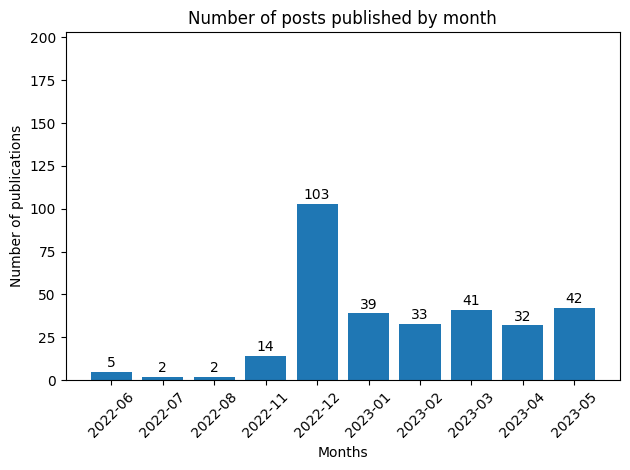

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

# Extract months from datetime objects
months = [date.strftime("%Y-%m") for date in dates]

# Create a Counter object for the months
popular_months = Counter(months)

# Extract months and their counts
monthsC = []
months_counts = []
for month, count in popular_months.items():
    monthsC.append(month)
    months_counts.append(count)

data = list(zip(monthsC, months_counts))

# Sort the list by date in ascending order
data.sort(key=lambda x: x[0])

# Unpack the sorted list into separate date and count lists
monthsC, months_counts = zip(*data)

# Create a bar chart
plt.bar(monthsC, months_counts)

# Customize the chart
plt.xlabel('Months')
plt.ylabel('Number of publications')
plt.title('Number of posts published by month')
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability

# Add publication counts at the top of the bars
for i, count in enumerate(months_counts):
    x = monthsC[i]
    y = count + 1  # Adjust the vertical position
    plt.text(x, y, str(count), ha='center', va='bottom', fontsize=10, rotation=0)

plt.ylim(0, max(months_counts) + 100)  # Adjust y-axis limits based on the maximum count

# Display the chart
plt.tight_layout()
plt.show()


In [16]:
# Example data
dates = ["2020-06", "2021-03", "2019-12", "2020-06", "2021-03"]
counts = [5, 10, 2, 8, 3]

# Combine the two lists into a list of tuples (date, count)
data = list(zip(dates, counts))

# Sort the list by date in ascending order
data.sort(key=lambda x: x[0])

# Unpack the sorted list into separate date and count lists
sorted_dates, sorted_counts = zip(*data)

# Print the sorted lists
print(sorted_dates)
print(sorted_counts)


('2019-12', '2020-06', '2020-06', '2021-03', '2021-03')
(2, 5, 8, 10, 3)


# A nivel de hashtag

In [17]:
popular_hashtag = Counter(hashtags).most_common(10)
for hashtag, count in popular_hashtag:
    print(f'On {hashtag}: {count}')

On noalaborto: 1243
On encontradelaborto: 930
On asesinasaborteras: 930
On follow: 930
On like: 930
On fueraaborteras: 930
On nuncaafavor: 620
On fueralasproaborto: 620
On asesinas: 620
On fueraproasesinatos: 620


In [18]:
target = ["noalaborto", "salvemoslasdosvidas", "sialavida", "mareaverde", "quesealey", "provida"]

for t in target:
    print(f"On {t}: {hashtags.count(t)}")

On noalaborto: 1243
On salvemoslasdosvidas: 0
On sialavida: 0
On mareaverde: 0
On quesealey: 0
On provida: 0


In [19]:
print(len(hashtags))

11560


# A nivel de autor


In [20]:
print(f"Average number of post by publisher: {n_post/len(set(profiles))}")
publishers = []
publication_counts = []
popular_publisher = Counter(profiles).most_common(40)
for publisher, count in popular_publisher:
    #print(f'On {publisher}: {count}')
    publishers.append(publisher)
    publication_counts.append(count)

Average number of post by publisher: 52.166666666666664


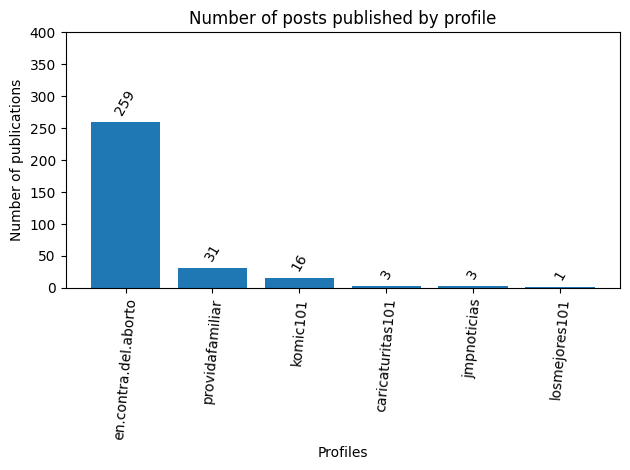

In [21]:

# Create a bar chart
plt.bar(publishers, publication_counts)

# Customize the chart (optional)
plt.xlabel('Profiles')
plt.ylabel('Number of publications')
plt.title('Number of posts published by profile')
plt.xticks(rotation=85, fontsize=10)  # Rotate x-axis labels for better readability
for i, count in enumerate(publication_counts):
    
    x = publishers[i] 
    y = count +7  # Adjust the vertical position
    plt.text(x, y, str(count), ha='center', va='bottom', fontsize=10, rotation=60)
plt.ylim(0, 400)
# Display the chart

plt.tight_layout()  # Ensures labels fit within the figure area
plt.show()

In [22]:
popular_publisher = Counter(profiles).most_common(15)
for publisher, count in popular_publisher:
    print(f'On {publisher}: {count}')
    

On en.contra.del.aborto: 259
On providafamiliar: 31
On komic101: 16
On caricaturitas101: 3
On jmpnoticias: 3
On losmejores101: 1


In [23]:
posts = []
with open(POSTS_PATH, 'r') as input_file:

    for line in input_file:
        posts.append(json.loads(line))

In [24]:
sorted_data = sorted(posts, key=lambda x: x['n_comments'] + x['likes'], reverse=True)
n = 5  # Number of texts to retrieve
highest_texts = [(d['n_comments'] + d['likes'], d["date"], d['caption'], d["_id"], d["url"]) for d in sorted_data[:n]]

for i in highest_texts:
    print(i)

(8095, '2023-02-05T01:00:44.000Z', 'Me encantó este videito que te comparto ! Ojalá que ayude a tomar conciencia de lo que se está promoviendo desgraciadamente en varios lugares del mundo… Aquí te dejo este testimonio en primera persona. Cuidemos y protejamos la vida de todos ! Comparte este mensaje! Bendiciones! @padreadolfo\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n#vida #vidahumana #noalaborto #noalabortosialavida #down #downsyndrome #sindromededown', '64763111967e4199e3264c16', 'https://www.instagram.com/p/CoQvFYJNz-4')
(5576, '2023-05-26T13:08:45.000Z', 'De coherencia no se van a morir…\nTampoco de inteligencia.\n\nPero en fin, los leo\n\nCompártelo (y etiquétame para irte a comentar por tu lado también 😎) \n\n.\n.\n.\n#LobbyPolitico #PorDetras\n#Lobby\n#NoAlAborto\n#ProVida\n#Trans\n\n#ConLosNiñosNo\n#Balenciaga \n#Trans\n#Transgenero\n#Biologia \n#LeyTrans \n#IreneMontero\n#Igualdad\n#EnLasCompetenciasFemeninasNo \n#LGTBQRSTUWXYZ \n#LGTBQ \n#Mujeres \n#Mujer\n#Amigues \n#Feministas \nEl #P

# Gráficos estadísticos


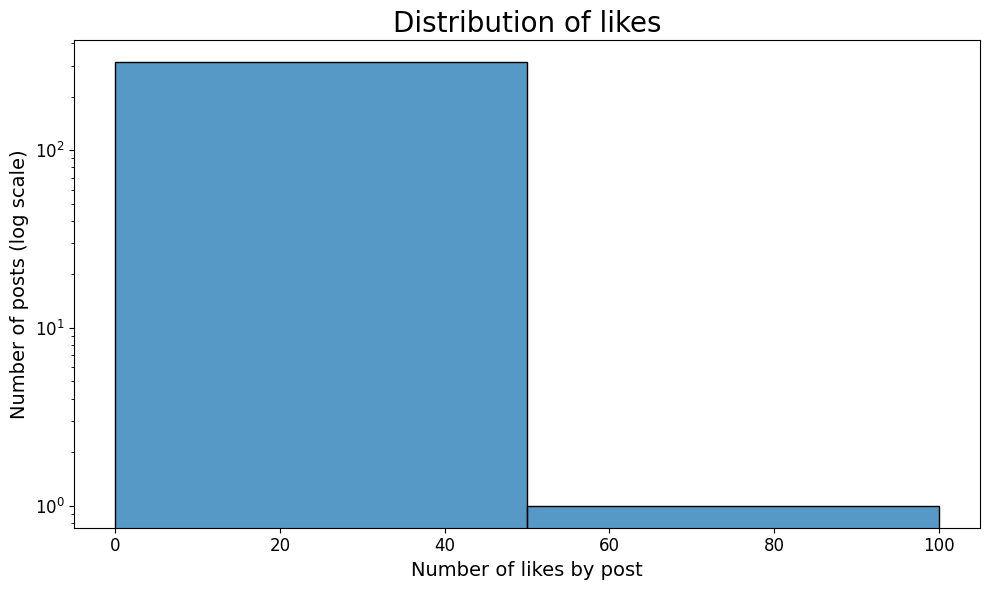

In [25]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the main histogram using Seaborn
sns.histplot(n_likes, bins=range(0, max(n_likes) + 50, 50), kde=False, ax=ax, log=True)
# Customize the main histogram
ax.set_xlabel('Number of likes by post', fontsize=14)
ax.set_ylabel('Number of posts (log scale)', fontsize=14)
ax.set_title('Distribution of likes', fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the chart
plt.tight_layout()
plt.show()


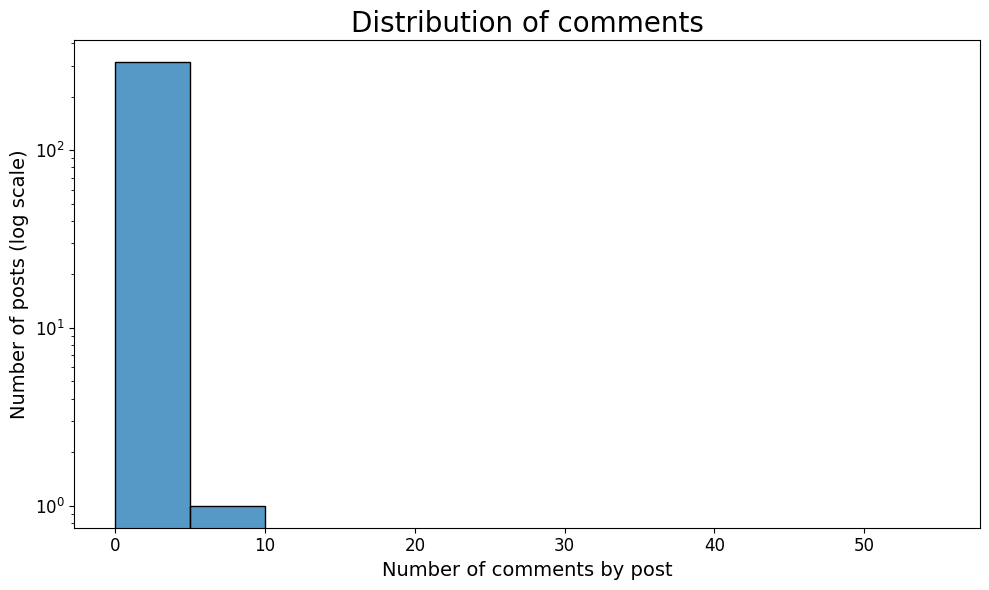

In [26]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the main histogram using Seaborn
sns.histplot(n_comments, bins=range(0, max(n_comments) + 50, 5), kde=False, ax=ax, log=True)
# Customize the main histogram
ax.set_xlabel('Number of comments by post', fontsize=14)
ax.set_ylabel('Number of posts (log scale)', fontsize=14)
ax.set_title('Distribution of comments', fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the chart
plt.tight_layout()
plt.show()


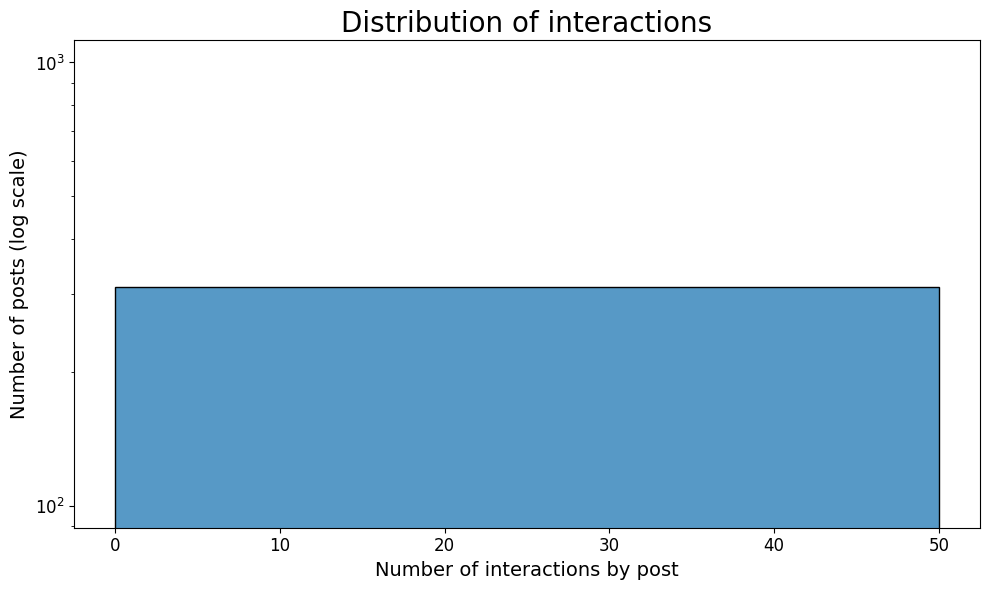

In [27]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the main histogram using Seaborn
sns.histplot(n_interactions, bins=range(0, max(n_interactions) + 1, 50), kde=False, ax=ax, log=True)
# Customize the main histogram
ax.set_xlabel('Number of interactions by post', fontsize=14)
ax.set_ylabel('Number of posts (log scale)', fontsize=14)
ax.set_title('Distribution of interactions', fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the chart
plt.tight_layout()
plt.show()


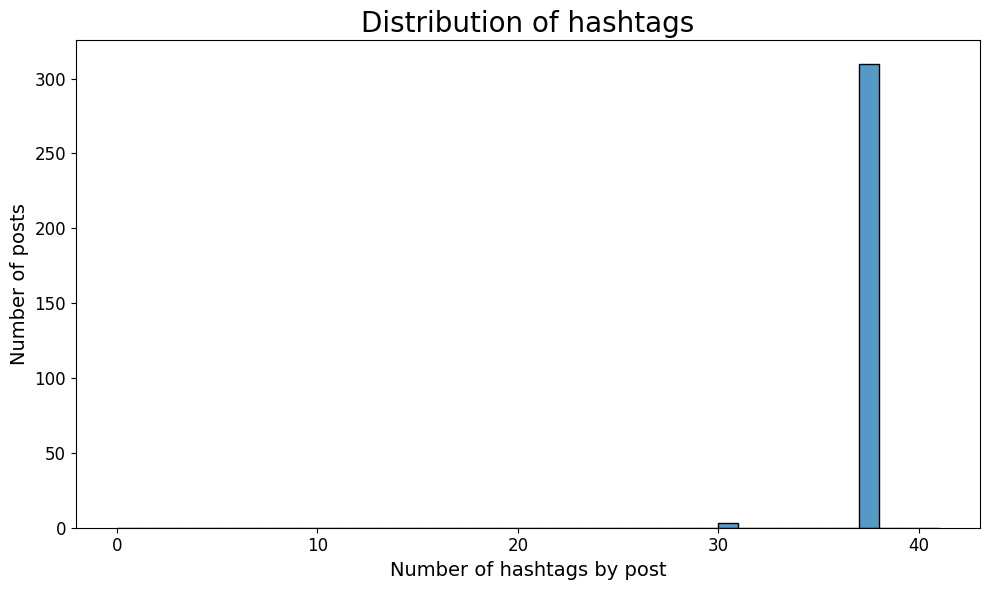

In [28]:


# Example data (replace with your actual data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the main histogram using Seaborn
sns.histplot(n_hashtags, bins=range(0, max(n_hashtags) + 5, 1), kde=False, ax=ax)
# Customize the main histogram
ax.set_xlabel('Number of hashtags by post', fontsize=14)
ax.set_ylabel('Number of posts', fontsize=14)
ax.set_title('Distribution of hashtags', fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the chart
plt.tight_layout()
plt.show()


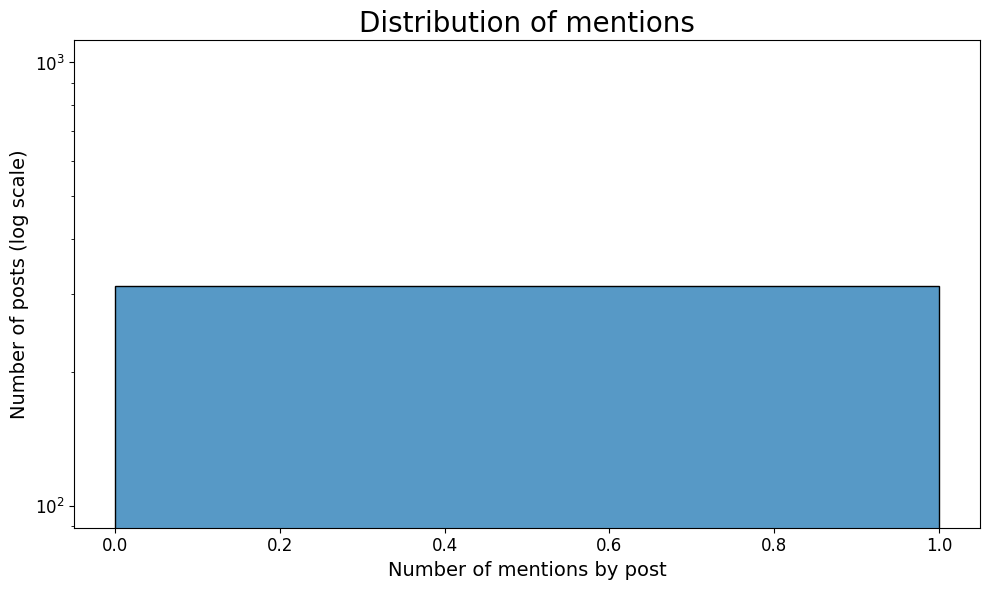

In [29]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the main histogram using Seaborn
sns.histplot(n_mentions, bins=range(0, max(n_mentions) + 2, 1), kde=False, ax=ax, log=True)
# Customize the main histogram
ax.set_xlabel('Number of mentions by post', fontsize=14)
ax.set_ylabel('Number of posts (log scale)', fontsize=14)
ax.set_title('Distribution of mentions', fontsize=20)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the chart
plt.tight_layout()
plt.show()


# Old
